In [17]:
import sys
sys.path.append('..')
import sfp
import pyrtools as pt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [7]:
stimuli = np.load('../data/stimuli/task-sfp_stimuli.npy')
stim_df = pd.read_csv('../data/stimuli/task-sfp_stim_description.csv')

In [33]:
stim_idx = 0
stim = stimuli[stim_idx]
w_r = stim_df.iloc[stim_idx].w_r
w_a = stim_df.iloc[stim_idx].w_a
dx, dy, _, _ = sfp.stimuli.create_sf_maps_cpp(stim.shape[0], w_r=w_r, w_a=w_a)

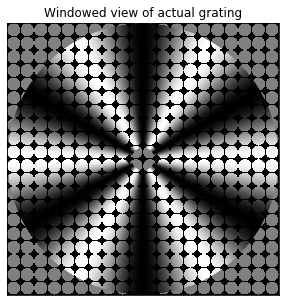

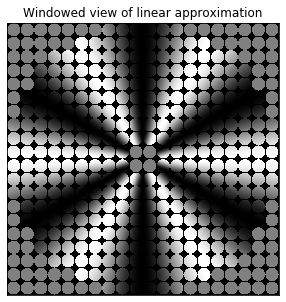

In [34]:
sfp.plotting.plot_grating_approximation(stim, dx, dy, 20, w_r=w_r, w_a=w_a);

In [35]:
loc_x, loc_y = np.random.randint(0, 1080, 2)

In [36]:
size = 1080
origin = ((size+1) / 2., (size+1) / 2.)

x_orig, y_orig = np.meshgrid(np.array(range(1, size+1))-origin[0],
                             np.array(range(1, size+1))-origin[1])
local_x = x_orig[loc_y, loc_x]
local_y = y_orig[loc_y, loc_x]

w_x = 2 * np.pi * dx[loc_y, loc_x]
w_y = 2 * np.pi * dy[loc_y, loc_x]

In [321]:
phase=0
np.mod(((w_r * np.log(2))/2.) * np.log2(local_x**2 + local_y**2) +
        w_a * np.arctan2(local_y, local_x) + phase, 2*np.pi)

4.027276539488792

How to do a Monte Carlo approximation of this?

In [129]:
def dy_func(x, y, w_r, w_a):
     return (y * w_r + w_a * x) / (2*np.pi*(x**2 + y**2))
def dx_func(x, y, w_r, w_a):
    return (x * w_r - w_a * y) / (2*np.pi*(x**2 + y**2))

In [313]:
dy_func(local_x, local_y, w_r, w_a)

-0.0017302174519407227

In [316]:
N = 1000
approx = []
rand_range = 10
for i in range(N):
    rand_x = np.random.uniform(-rand_range, rand_range)
    #rand_y = np.random.uniform(-rand_range, rand_range)
    approx.append(dx_func(local_x+rand_x, local_y, w_r, w_a))

(2*rand_range)*np.mean(approx)

-0.013666011464491323

In [318]:
N = 1000
approx = []
rand_range = 10
for i in range(N):
    #rand_x = np.random.uniform(-rand_range, rand_range)
    rand_y = np.random.uniform(-rand_range, rand_range)
    approx.append(dy_func(local_x, local_y+rand_y, w_r, w_a))

(2*rand_range)*np.mean(approx)

-0.03458751082286119